In [1]:
import math
import random
import matplotlib.pyplot as plt


In [2]:
random.seed(42)
def generar_datos(n=50, a_true=2.5, b_true=0.4, c_true=0.8, ruido=0.05):
    xs = [random.uniform(-2.0, 2.0) for _ in range(n)]
    datos = []
    for x in xs:
        y = a_true * math.exp(b_true * x) + c_true + random.gauss(0, ruido)
        datos.append((x, y))
    return datos



In [3]:
def func_objetivo(a, b, c, datos):
    e = math.e
    mse = 0
    for x, y_real in datos:
        y_pred = a * (e ** (b * x)) + c
        mse += (y_real - y_pred) ** 2
    return mse / len(datos)


In [4]:
# FUNCION PARA INICIAR UN INDIVIDUO
def iniciar_individuo(max,min):
    a = random.uniform(min,max)
    b = random.uniform(min,max)
    c = random.uniform(min,max)
    sigma_a = random.uniform(0.1,1.0) # LA LITERATURA RECOMIENDA ENTRE 0.1 Y 1.0
    sigma_b = random.uniform(0.1,1.0)
    sigma_c = random.uniform(0.1,1.0)
    return a, b, c, sigma_a, sigma_b, sigma_c


In [5]:
# FUNCION AUTOADAPTATIVA
def mutacion(individuo,min,max):
    n = 2 # Dimension
    tau = 1/math.sqrt(2*math.sqrt(n))
    tau_prima = 1/math.sqrt(2*n)
    
    a,b,c,sigma_a,sigma_b,sigma_c = individuo
    # Ruido global y local
    N0 = random.gauss(0,1)
    sigma_a *= math.exp(tau_prima * N0 + tau * random.gauss(0,1)) # sigma_a
    sigma_b *= math.exp(tau_prima * N0 + tau * random.gauss(0,1)) # sigma_b
    sigma_c *= math.exp(tau_prima * N0 + tau * random.gauss(0,1)) # sigma_c

    # Mutacion de las variables de decision
    a += sigma_a * random.gauss(0,1)
    b += sigma_b * random.gauss(0,1)
    c += sigma_c * random.gauss(0,1)

    
    # Restringimos al dominio
    if a < min:
        a = min
    if a > max:
        a = max
    if b < min:
        b = min
    if b > max:
        b = max
    if c < min:
        c = min
    if c > max:
        c = max
    individuo = (a,b,c,sigma_a,sigma_b,sigma_c)
    return individuo

In [6]:
# SELECCION (MU,LAMBDA)  mu coma lambda
def seleccion_mu_lambda(poblacion, mu, datos):
    poblacion.sort(key=lambda ind: func_objetivo(ind[0], ind[1], ind[2], datos))
    return poblacion[:mu]


# SELECCION (MU+LAMBDA) mu mas lambda
def seleccion_mu_mas_lambda(padres, hijos, mu, datos):
    poblacion = padres + hijos
    poblacion.sort(key=lambda ind: func_objetivo(ind[0], ind[1], ind[2], datos))
    return poblacion[:mu]

In [7]:

# ============ ALGORITMO ==============
Imax = 5
Imin = -Imax
mu = 50
lambda_ = 200
generaciones = 10


poblacion = [iniciar_individuo(Imax,Imin) for _ in range(mu)]
datos = generar_datos()
historicos = []
historicos_errores = []
# Evolucion
for g in range(generaciones):
    offspring = []
    for i in range(lambda_):
        padre = random.choice(poblacion)
        hijo = mutacion(padre,Imin,Imax)
        offspring.append(hijo)
    # Seleccionamos los mejores individuos de la poblacion y la descendencia
    poblacion = seleccion_mu_mas_lambda(poblacion, offspring, mu, datos)
    mejor = poblacion[0]

    error_cuadratico_medio = func_objetivo(mejor[0],mejor[1],mejor[2],datos)/len(datos)
    a,b,c,sigma_a,sigma_b,sigma_c = mejor
    historicos.append(mejor)
    historicos_errores.append(error_cuadratico_medio)

    print(f"""Generacion Con (mu+lambda) {g+1}:
          a = {a:.4f}, b = {b:.4f}, c = {c:.4f},
          sigma_a = {sigma_a}, sigma_b = {sigma_b}, sigma_c = {sigma_c},
          Fitness = {func_objetivo(a,b,c,datos):.4f} |Error cuadratico medio = {error_cuadratico_medio}
          """)

Generacion Con (mu+lambda) 1:
          a = 1.0892, b = 0.9490, c = 1.2774,
          sigma_a = 2.5388530615380867, sigma_b = 0.5210840650374765, sigma_c = 0.12306169189734797,
          Fitness = 0.5373 |Error cuadratico medio = 0.010746657248743116
          
Generacion Con (mu+lambda) 2:
          a = 2.2371, b = 0.3905, c = 1.6946,
          sigma_a = 0.227489869903833, sigma_b = 0.027924484002270277, sigma_c = 0.4063256810154756,
          Fitness = 0.3221 |Error cuadratico medio = 0.006442728316582066
          
Generacion Con (mu+lambda) 3:
          a = 2.0425, b = 0.3780, c = 1.3839,
          sigma_a = 0.3304693029665667, sigma_b = 0.024824291881837098, sigma_c = 0.4427935337564598,
          Fitness = 0.1066 |Error cuadratico medio = 0.0021315790446735593
          
Generacion Con (mu+lambda) 4:
          a = 2.3777, b = 0.3786, c = 1.2045,
          sigma_a = 1.0448928919420222, sigma_b = 0.024947123802199322, sigma_c = 0.08767873549242973,
          Fitness = 0.0609 |Error

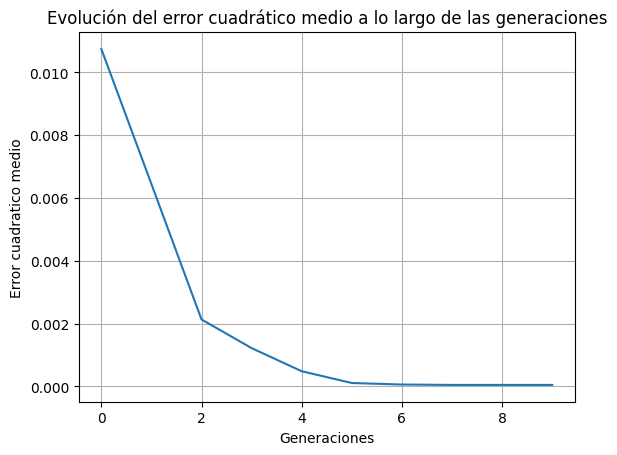

In [8]:
# Plot resultados

historico_individuos = historicos # (a,b,c,sigma_a,sigma_b,sigma_c)
historico_error = historicos_errores

plt.plot(historico_error)
plt.xlabel('Generaciones')
plt.ylabel('Error cuadratico medio')
plt.title('Evolución del error cuadrático medio a lo largo de las generaciones')
plt.grid()




In [9]:

# ============ ALGORITMO ==============
Imax = 5
Imin = -Imax
mu = 50
lambda_ = 200
generaciones = generaciones


poblacion = [iniciar_individuo(Imax,Imin) for _ in range(mu)]
datos = datos
historicos_mu_lambda = []
historicos_errores_mu_lambda = []

# Evolucion
for g in range(generaciones):
    offspring = []
    for i in range(lambda_):
        padre = random.choice(poblacion)
        hijo = mutacion(padre,Imin,Imax)
        offspring.append(hijo)
    # Seleccionamos los mejores individuos de la poblacion y la descendencia
    poblacion = seleccion_mu_lambda(offspring, mu, datos)
    mejor = poblacion[0]

    error_cuadratico_medio = func_objetivo(mejor[0],mejor[1],mejor[2],datos)/len(datos)
    a,b,c,sigma_a,sigma_b,sigma_c = mejor
    historicos_mu_lambda.append(mejor)
    historicos_errores_mu_lambda.append(error_cuadratico_medio)

    # print(f"""Generacion con (mu,lambda) {g+1}:
    #       a = {a:.4f}, b = {b:.4f}, c = {c:.4f},
    #       sigma_a = {sigma_a}, sigma_b = {sigma_b}, sigma_c = {sigma_c},
    #       Fitness = {func_objetivo(a,b,c,datos):.4f} |Error cuadratico medio = {error_cuadratico_medio}
    #       """)

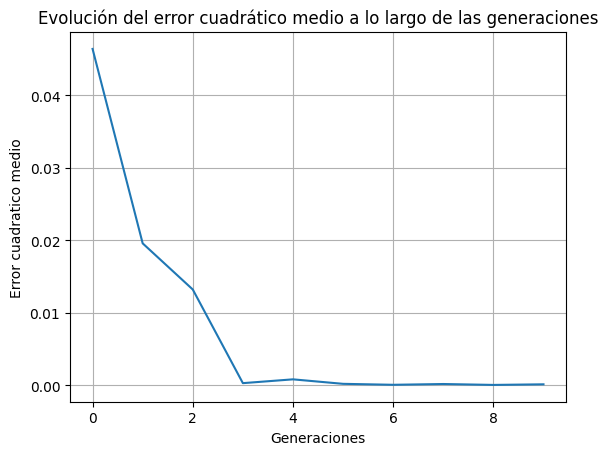

In [10]:
# Plot resultados

historico_individuos = historicos_mu_lambda # (a,b,c,sigma_a,sigma_b,sigma_c)
historico_error = historicos_errores_mu_lambda

plt.plot(historico_error)
plt.xlabel('Generaciones')
plt.ylabel('Error cuadratico medio')
plt.title('Evolución del error cuadrático medio a lo largo de las generaciones')
plt.grid()




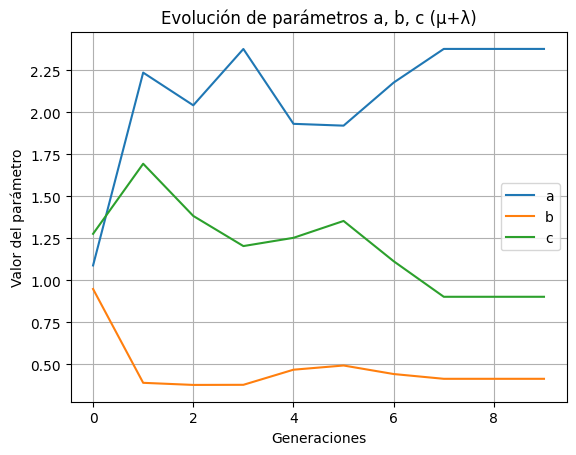

In [11]:
# Trajectoria de a, b, c en (μ+λ)
a_hist = [ind[0] for ind in historicos]
b_hist = [ind[1] for ind in historicos]
c_hist = [ind[2] for ind in historicos]

plt.figure()
plt.plot(a_hist, label="a")
plt.plot(b_hist, label="b")
plt.plot(c_hist, label="c")
plt.xlabel("Generaciones")
plt.ylabel("Valor del parámetro")
plt.title("Evolución de parámetros a, b, c (μ+λ)")
plt.legend()
plt.grid(True)
plt.show()


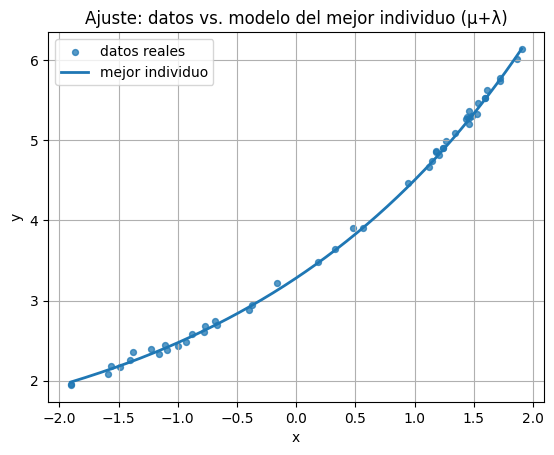

In [12]:
# === Corrección rápida antes de graficar ===
# En tus bucles, usa SIEMPRE:
# error_cuadratico_medio = func_objetivo(mejor[0], mejor[1], mejor[2], datos)

# === Al final del primer experimento (mu+lambda) ===
# mejor individuo final y datos ordenados
a_best, b_best, c_best, *_ = historicos[-1]
xs = [x for x, _ in datos]
ys = [y for _, y in datos]

# grid ordenado
import numpy as np
x_grid = np.linspace(min(xs), max(xs), 400)
y_hat = [a_best * math.exp(b_best * x) + c_best for x in x_grid]

plt.figure()
plt.scatter(xs, ys, s=18, alpha=0.75, label="datos reales")
plt.plot(x_grid, y_hat, linewidth=2.0, label="mejor individuo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste: datos vs. modelo del mejor individuo (μ+λ)")
plt.legend()
plt.grid(True)
plt.show()
